### PyTorch Libraries

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix

### Extarct Transform & Loading 

In [2]:
# using torchvision to access the dataset
# using torchvision.transform, image is transformed
# into pytorch.tensors
# 60,000 images in training data
# 10,000 images in testing data

'''
EXTRACT & TRANSFORM
'''

train = datasets.FashionMNIST("",
                       train=True,
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))  
test = datasets.FashionMNIST("",
                       train=False,
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))  

In [3]:
# Dataloader wraps the dataset into
# dataloader instance, which is helpful 
# to perform specific operations such as
# batching(size=10), shuffle etc.

'''
LOADING DATA
'''

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth =120)

### Analyzing datasets

In [5]:
'''
Creating a counter function to 
count the number of labels in 
each of the datasets i.e. train
and test dataset

'''

total = 0
counter_dict_tr = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
counter_dict_test = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    xs,ys = data
    for y in ys:
        counter_dict_tr[int(y)]+=1
        total+=1
        
for data in testset:
    xs,ys = data
    for y in ys:
        counter_dict_test[int(y)]+=1
        total+=1
        
print('Bin count of labels in the training dataset ' ,  counter_dict_tr)
print('Bin count of labels in the test dataset ' ,  counter_dict_test)
print('Dataset is balance as the labels are uniformly distributed')

Bin count of labels in the training dataset  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
Bin count of labels in the test dataset  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
Dataset is balance as the labels are uniformly distributed


In [6]:
# Acessing one single sample for analysis
# it uses sequence unpacking or list
# unpacking of object

sample = next(iter(trainset))
print(len(sample))
print(type(sample))
image,label = sample 

2
<class 'list'>


torch.Size([10, 1, 28, 28])
torch.Size([10])
label : tensor(1)


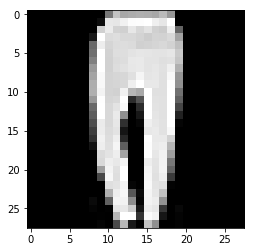

In [7]:
# Ploting the image in the sample[0][0]
# Plotting the lable of the sample[0]

print(image.shape)
print(label.shape)
plt.imshow(image[0][0].view(28,28),cmap='gray');
print('label :' ,label[0])

labels: tensor([1, 4, 8, 4, 3, 3, 1, 2, 7, 8])


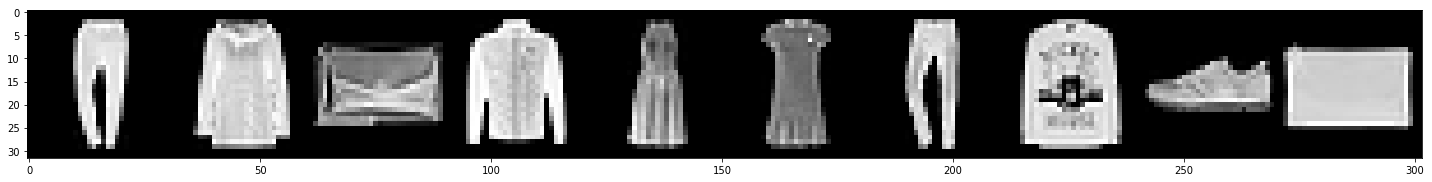

In [8]:
# printing the items of the batch
# using grid utility function

grid = torchvision.utils.make_grid(image,nrow=10)
plt.figure(figsize=(25,30))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:',label)

### Modeling

In [9]:
class Network(nn.Module):
    '''
    Creating Neural Network class through
    1. extending the base neural network module of pytorch
    2. creating layers both convolutional and linear for CNN model
    3. assigning hyperparameters & data-dependent parameters
    that uses the inheritance method to use all the module functionality
    and allows the user to add their own custome functionality or change 
    the existing function using ( __ repr__) function
    
    Hyperparameters : out_channels, kernel_size(5,5), out_features
    Data dependent parameters : in_channel, out_feature at the last
    
    '''
    def __init__(self):
        super().__init__() # extending the Pytorch nn module class
        
        self.conv1 = nn.Conv2d(in_channels =1,out_channels = 6,kernel_size = 5,stride =1)
        self.conv2 = nn.Conv2d(in_channels =6,out_channels = 12,kernel_size = 5,stride =1)
        self.fc1 = nn.Linear(in_features = 12*4*4,out_features=120,bias = True)
        self.fc2 = nn.Linear(in_features = 120,out_features=60,bias =True)
        self.out = nn.Linear(60,10)
    
    def forward(self,t):
        # input layer (generally not required as all the data are passed to next layer without any change)
        t=t
        
        # hidden layer -1
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        # hidden layer -2
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        # hidden linear layer -1
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        
        # hidden linear layer -2
        t=self.fc2(t)
        t=F.relu(t)
        
        # output layer
        t=self.out(t)
        #t=F.softmax(t)
        
        return t
        
        
network = Network()
print(network)


Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [10]:
# Parameters in the CNN model
for name,param in network.named_parameters():
    print(name,'\t\t',param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


### Training with a single batch

In [11]:
# Training the model with a batch of 10 images

batch = next(iter(trainset))
images,labels = batch
print(images.shape)
print(labels.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [13]:
# prediction
'''
The batch with 10 images are processed
in the neural network model and the 
probability is calculated using the
softmax function for each class row wise

'''
pred = network(images)
print(pred.shape)
pred



torch.Size([10, 10])


tensor([[ 0.1166, -0.0759,  0.1115,  0.1145, -0.0509,  0.1428,  0.0515, -0.0891, -0.0794,  0.0160],
        [ 0.1169, -0.0836,  0.1098,  0.1024, -0.0415,  0.1579,  0.0408, -0.1022, -0.0758,  0.0102],
        [ 0.1182, -0.0716,  0.1069,  0.1079, -0.0492,  0.1473,  0.0493, -0.0889, -0.0773,  0.0145],
        [ 0.1168, -0.0758,  0.1097,  0.1049, -0.0424,  0.1464,  0.0440, -0.0920, -0.0774,  0.0141],
        [ 0.1247, -0.0815,  0.1057,  0.1173, -0.0385,  0.1629,  0.0470, -0.0934, -0.0780,  0.0028],
        [ 0.1164, -0.0846,  0.1108,  0.1082, -0.0360,  0.1608,  0.0415, -0.0944, -0.0722,  0.0068],
        [ 0.1205, -0.0764,  0.1076,  0.1073, -0.0419,  0.1606,  0.0436, -0.0944, -0.0707,  0.0051],
        [ 0.1204, -0.0851,  0.1120,  0.1146, -0.0394,  0.1577,  0.0462, -0.0954, -0.0741,  0.0065],
        [ 0.1224, -0.0694,  0.1054,  0.1086, -0.0430,  0.1557,  0.0485, -0.0943, -0.0715,  0.0101],
        [ 0.1218, -0.0842,  0.1093,  0.1125, -0.0395,  0.1540,  0.0459, -0.0908, -0.0740,  0.0070]],

In [14]:
'''
using argmax function to determine
the index of the maximum occuring
probability for each image in the 
the batch

'''
pred.argmax(dim=1)

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [15]:
'''

comparison between the original
labels & predicted labels from 
the model

'''
print(labels)
print(pred.argmax(dim=1).eq(labels))

def get_correct_pred(pred,labels):
    return pred.argmax(dim=1).eq(labels).sum().item()

print('Total correct predictions :',get_correct_pred(pred,labels))

tensor([5, 9, 5, 8, 6, 4, 8, 1, 5, 0])
tensor([ True, False,  True, False, False, False, False, False,  True, False])
Total correct predictions : 3


### Calculating Loss. Gradient & Update Weights

In [16]:
# Calculate Gradient

print('Gradient values initially',network.conv1.weight.grad)

Gradient values initially None


In [18]:
# Calculate Loss & optimize
optimizer = optim.Adam(network.parameters(),lr=0.01)

batch = next(iter(trainset))
images,labels=batch
pred = network(images)
loss = F.cross_entropy(pred,labels)
loss.backward()
optimizer.step()

In [19]:
print('Gradient values after',network.conv1.weight.grad.shape)

Gradient values after torch.Size([6, 1, 5, 5])


In [20]:
print(loss.item())

2.2915780544281006


### Training with all batches : A single epoch

In [21]:
train_loader = torch.utils.data.DataLoader(train,batch_size=100)
epochs = 1


for epocs in range(epochs):
    
    '''
    For each epoch, loop will fetch a batch,
    predict the values, calculate the loss,
    optimize the loss, upgrade the loss,
    repeat for the next epoch
    
    '''
    
    
    
    total_loss=0
    total_correct=0
    
    for batch in train_loader: # Get Batch
        images,labels = batch
        
        network.zero_grad()
        output = network(images.view(100,1,28,28)) # Pass Batch
        loss=F.cross_entropy(output,labels) # Calculate loss
        
        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
        
        total_loss += loss.item()
        total_correct += get_correct_pred(output,labels)
    print("loss:",loss)

loss: tensor(0.4184, grad_fn=<NllLossBackward>)


In [23]:
print('Total % correct prediction ',total_correct/(len(train_loader)*100) )

Total % correct prediction  0.7757833333333334


### Training with all batches : multiple epochs

In [25]:
epochs= 5
for epoch in range(epochs):
    
    total_loss=0
    total_correct=0
    
    for batch in train_loader: # Get Batch
        images,labels = batch
        
        network.zero_grad()
        output = network(images.view(100,1,28,28)) # Pass Batch
        loss=F.cross_entropy(output,labels) # Calculate loss
        
        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
        
        total_loss += loss.item()
        total_correct += get_correct_pred(output,labels)
        
    print("Total loss for epoch ",epoch, " is ",total_loss)
    print('Accuray for epoch ',epoch, " is ","{0:.2f}".format(total_correct*100/(len(train_loader)*100)),'%' )

Total loss for epoch  0  is  245.59384287893772
Accuray for epoch  0  is  84.79 %
Total loss for epoch  1  is  226.8136183321476
Accuray for epoch  1  is  85.83 %
Total loss for epoch  2  is  219.9233556240797
Accuray for epoch  2  is  86.31 %
Total loss for epoch  3  is  213.881880864501
Accuray for epoch  3  is  86.61 %
Total loss for epoch  4  is  209.16456937789917
Accuray for epoch  4  is  87.00 %


### Analyzing CNN Results - Builing & Plotting a Confusion Matrix

In [26]:
'''
Creating a function to collect
all the prediction on the batches
of the trainset and concatenate 
into a single prediction tensor

'''

def get_all_preds(model,loader):
    all_preds=torch.tensor([])
    for batch in loader:
        images, labels = batch
        preds = model(images)
        all_preds=torch.cat((all_preds,preds),dim=0)
    return all_preds

In [33]:
# Increasing the batch size to gather
# all the predictions of 60,000 images

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train,batch_size =10000)
    train_pred = get_all_preds(network, prediction_loader)

In [35]:
# Calculating total number of correct preds

print('Total correct prediction from CNN model is ',get_correct_pred(train_pred,train.targets))

Total correct prediction from CNN model is  51588


In [36]:
# Comparing the predictions

train.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [37]:
train_pred.argmax(dim=1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [38]:
# Pairing up the predictions & targets

stacked = torch.stack(
    (
        train.targets,
        train_pred.argmax(dim=1)
    )
    , dim =1 # column wise
)

In [39]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [40]:
# Creating 10x10 confusion matrix

cmt = torch.zeros(10,10,dtype=torch.int32)
for p in stacked:
    j,k = p.tolist()
    cmt[j,k]=cmt[j,k]+1

cmt

tensor([[5405,  140,   96,  110,    6,    2,  207,    0,   33,    1],
        [  10, 5918,    1,   47,    8,    5,    5,    0,    6,    0],
        [  99,    9, 4707,  103,  606,    5,  431,    1,   38,    1],
        [ 250,  307,   14, 5148,  180,    3,   82,    0,   15,    1],
        [   9,   19,  556,  428, 4321,    0,  626,    0,   41,    0],
        [   2,    1,    2,    1,    0, 5675,    1,  191,   44,   83],
        [1577,   97,  622,  148,  367,    7, 3109,    0,   70,    3],
        [   0,    0,    0,    0,    0,  103,    0, 5724,   16,  157],
        [  17,   15,   31,   30,   13,   13,   52,    9, 5813,    7],
        [   1,    0,    0,    1,    1,   39,    0,  187,    3, 5768]], dtype=torch.int32)

In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

np.set_printoptions(precision=2)

Confusion matrix, without normalization


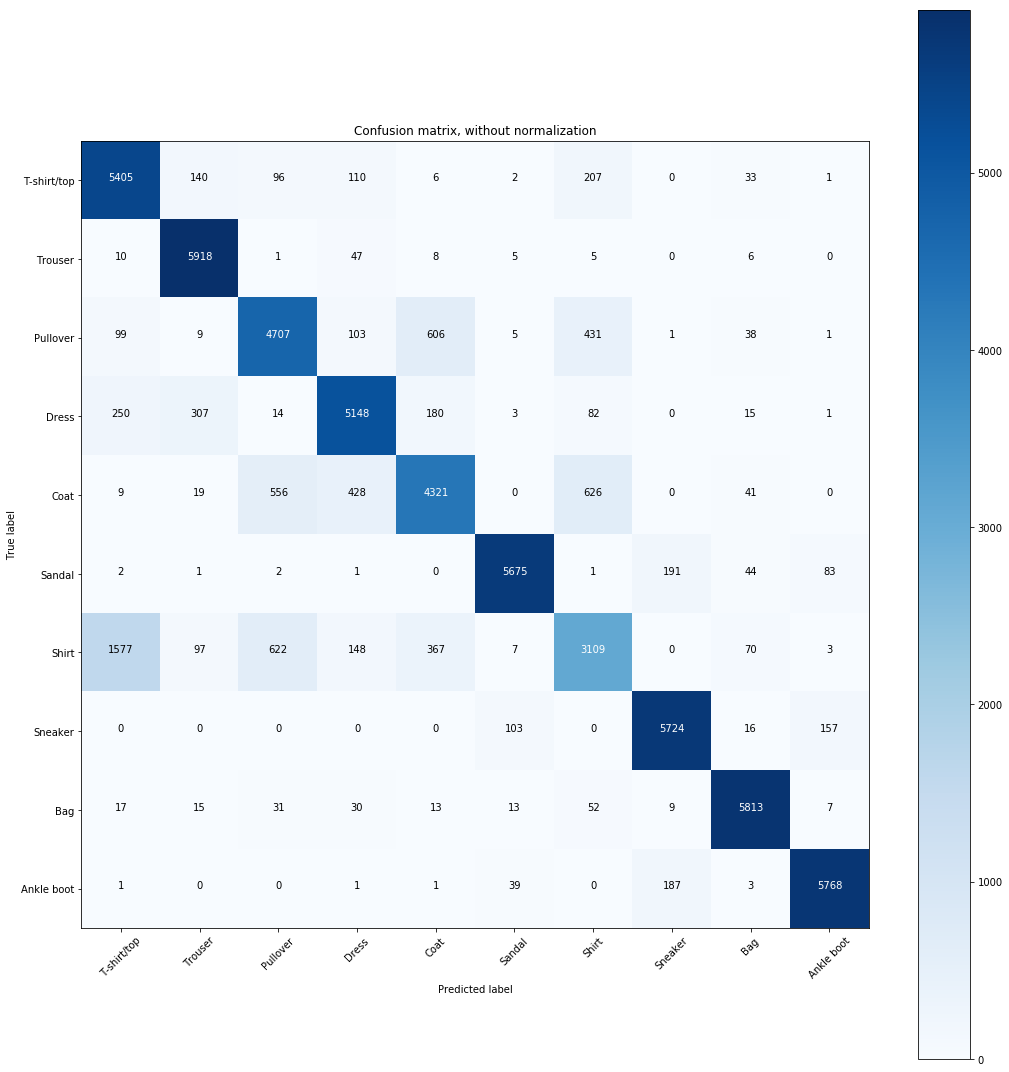

In [74]:
names = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')
plt.figure(figsize=(15,15));
plot_confusion_matrix(cmt, classes=names,
                      title='Confusion matrix, without normalization');

### CNN MOdel

In [36]:
import os 
import cv2
import numpy as np
from tqdm import tqdm
os.chdir(r"C:\kagglecatsanddogs_3367a")
# to rebuild the data once
# to avoid preprocessing of data
REBUILD_DATA = True

class DogsVsCats():
    
    '''
    Class DogsVsCats will create the required
    scale and size of images of cats and dogs.
    It will also assign the labels while processing
    the images and convert the pixels and labels
    into the array of images
    
    '''
    
    img_size = 50 #to make uniform size
    cats ="PetImages/Cat" # folder containing cat images
    dogs ="PetImages/Dog" # folder containing dog images
    labels = {cats:0,dogs:1} # labels for cats & dogs
    training_data = [] # training data list
    catcount=0 # initial count for cat
    dogcount=0 # initial count for dog
    
    def make_training_data(self):
         for label in self.labels:
             print(label)
             for f in tqdm(os.listdir(label)):
                 try:
                     path = os.path.join(label,f)
                     # converting img into grayscale
                     img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

                     # resize the image into 50x50 pixels
                     img = cv2.resize(img,(self.img_size,self.img_size))

                     # convert the image into a 2-D array
                     self.training_data.append([np.array(img),np.eye(2)[self.labels[label]]])

                     # count the number of cats & dogs
                     if label == self.cats:
                         self.catcount +=1
                     elif label == self.dogs:
                         self.dogcount +=1
                 except Exception  as e:
                     pass
        
         
         # once imported, shuffle the data 
         # save the file as numpy array file
        
         np.random.shuffle(self.training_data)
         np.save('training_data.npy',self.training_data)
         print("cats:",self.catcount)
         print('dogs',self.dogcount)
         
if REBUILD_DATA:
         dogsvscats = DogsVsCats()
         dogsvscats.make_training_data()

PetImages/Cat


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:20<00:00, 609.88it/s]


PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:21<00:00, 569.71it/s]


cats: 12476
dogs 12470


In [37]:
training_data = np.load("training_data.npy", allow_pickle=True)

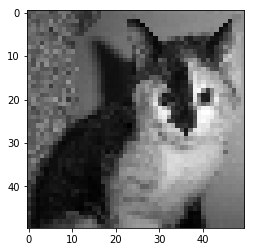

array([1., 0.])

In [45]:
# printing the image of the cat
plt.imshow(training_data[1][0],cmap = "gray")
plt.show()
# label of the image 1
training_data[1][1]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        